<a href="https://colab.research.google.com/github/opoluliakh/data-analytics-learning/blob/main/Poluliakh_HW2_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

/tmp/ipython-input-1075283697.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['count'].resample('M').mean()


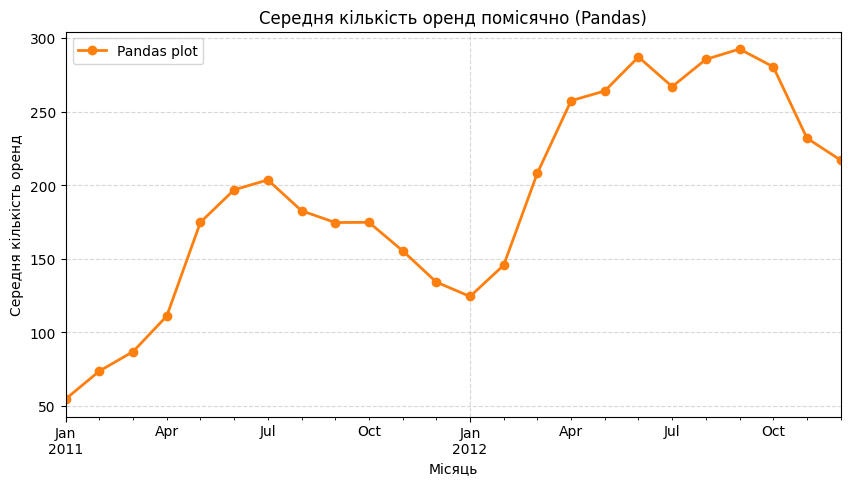

In [8]:
if not isinstance(df.index, pd.DatetimeIndex):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.set_index('datetime')

monthly = df['count'].resample('M').mean()

ax = monthly.plot(marker='o', linewidth=2, figsize=(10,5),
                  color='tab:orange', label='Pandas plot')
ax.set_title('Середня кількість оренд помісячно (Pandas)')
ax.set_xlabel('Місяць')
ax.set_ylabel('Середня кількість оренд')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
plt.show()



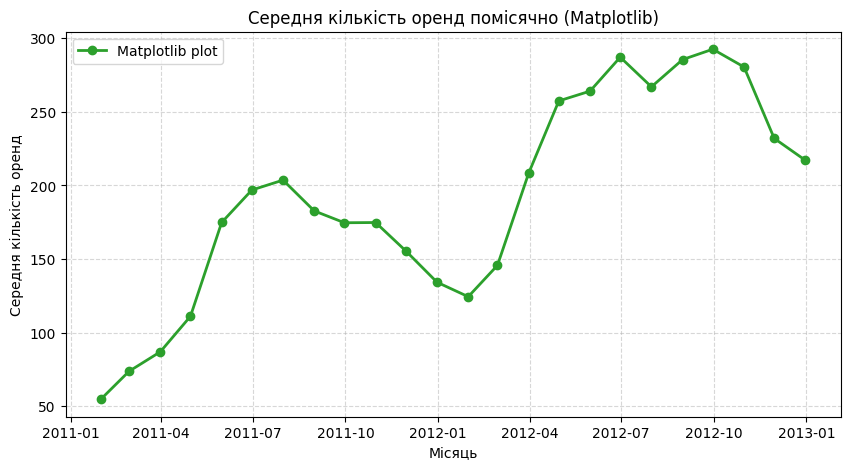

In [9]:
plt.figure(figsize=(10,5))
plt.plot(monthly.index, monthly.values, marker='o', linewidth=2,
         color='tab:green', label='Matplotlib plot')
plt.title('Середня кількість оренд помісячно (Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


Pandas plot: мінімум коду; «розуміє» індекс/дати сам.

Matplotlib: більше контролю над оформленням (кольори, стилі, анотації), але трохи довше писати.

Обидва графіки показують те саме. Можливо для швидкої перевірки - зручніший Pandas, для «полірованих» презентацій — Matplotlib.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [10]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

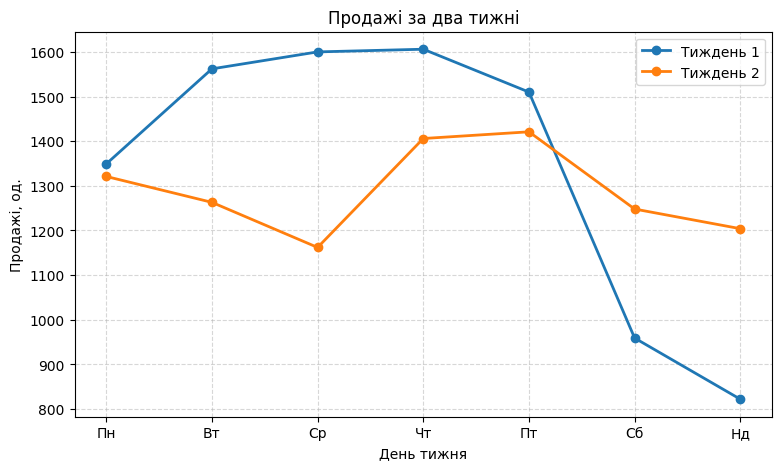

Тиждень 1: {'mean': 1344.0, 'std': 299.99857142517004, 'range': 784, 'cv': 0.22321322278658484}
Тиждень 2: {'mean': 1289.2857142857142, 'std': 90.9060964256355, 'range': 259, 'cv': 0.07050888365423252}


In [11]:
w1 = np.array(sales_week1)
w2 = np.array(sales_week2)

plt.figure(figsize=(9,5))
plt.plot(days, w1, marker='o', linewidth=2, label='Тиждень 1')
plt.plot(days, w2, marker='o', linewidth=2, label='Тиждень 2')
plt.title('Продажі за два тижні')
plt.xlabel('День тижня')
plt.ylabel('Продажі, од.')
plt.xticks(days, ['Пн','Вт','Ср','Чт','Пт','Сб','Нд'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

def stats(x):
    return {
        "mean": float(np.mean(x)),
        "std": float(np.std(x)),
        "range": int(np.max(x)-np.min(x)),
        "cv": float(np.std(x)/np.mean(x))
    }

s1, s2 = stats(w1), stats(w2)
print("Тиждень 1:", s1)
print("Тиждень 2:", s2)


1) Судячи з графіка, в який тиждень продажі були стабільніші? У тиждень 2 продажі значно стабільніші: крива майже рівна, без різких провалів або піків (на відміну від тижня 1, де у вихідні різкий спад).

2) Підтвердження обчисленнями

Стандартне відхилення (std):
Тиждень 1 - близько 300, Тиждень 2  - близько 90.9, тобто менше відхилення в тижні 2.
Розмах (max − min):
Тиждень 1 = 784, Тиждень 2 = 259, тобто менше коливання в тижні 2.
Коефіцієнт варіації (CV = std/mean):
Тиждень 1 - близько 0.223, Тиждень 2 - блиько 0.071, тобто відносна мінливість у тижні 2 утричі нижча.
Отже, і за графіком, і за метриками (std, range, CV) тиждень 2 має суттєво стабільніші продажі.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

/tmp/ipython-input-311058054.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_monthly = df['temp'].resample('M').mean()


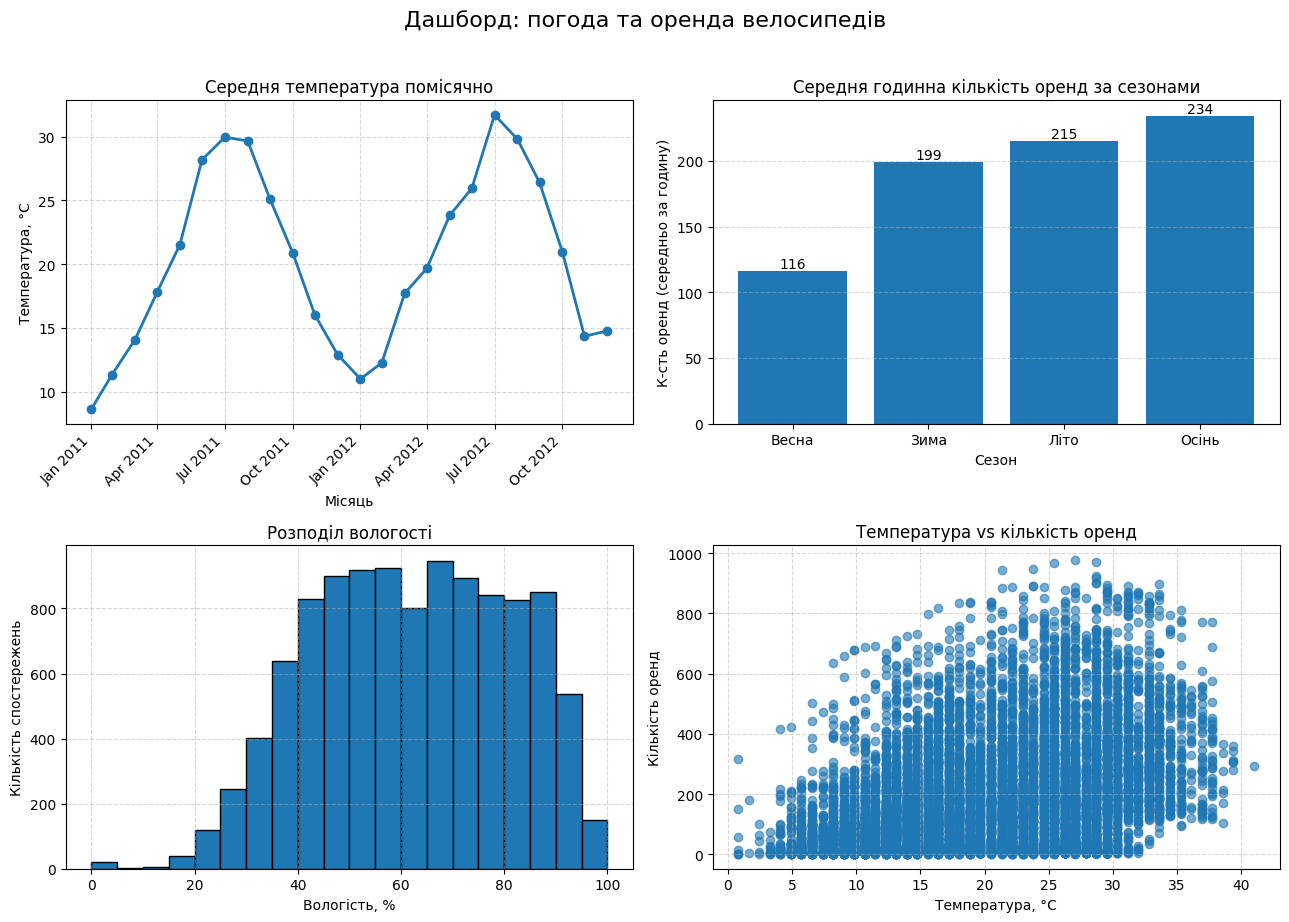

In [12]:
if 'datetime' in df.columns and not isinstance(df.index, pd.DatetimeIndex):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.set_index('datetime')


temp_monthly = df['temp'].resample('M').mean()
month_labels = temp_monthly.index.strftime('%b %Y')


season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
rentals_by_season = (
    df.groupby('season')['count']
      .mean()
      .rename(index=season_map)
      .sort_index()
)


humidity = df['humidity']


temp = df['temp']
count = df['count']


fig, axes = plt.subplots(2, 2, figsize=(13, 9))
fig.suptitle('Дашборд: погода та оренда велосипедів', fontsize=16, y=1.02)


ax = axes[0, 0]
ax.plot(temp_monthly.index, temp_monthly.values, marker='o', linewidth=2)
ax.set_title('Середня температура помісячно')
ax.set_xlabel('Місяць')
ax.set_ylabel('Температура, °C')

step = max(1, len(month_labels)//8)
ax.set_xticks(temp_monthly.index[::step])
ax.set_xticklabels(month_labels[::step], rotation=45, ha='right')
ax.grid(True, linestyle='--', alpha=0.5)


ax = axes[0, 1]
ax.bar(rentals_by_season.index, rentals_by_season.values)
ax.set_title('Середня годинна кількість оренд за сезонами')
ax.set_xlabel('Сезон')
ax.set_ylabel('К-сть оренд (середньо за годину)')

for i, v in enumerate(rentals_by_season.values):
    ax.text(i, v, f'{v:.0f}', ha='center', va='bottom')
ax.grid(axis='y', linestyle='--', alpha=0.5)


ax = axes[1, 0]
ax.hist(humidity, bins=20, edgecolor='black')
ax.set_title('Розподіл вологості')
ax.set_xlabel('Вологість, %')
ax.set_ylabel('Кількість спостережень')
ax.grid(True, linestyle='--', alpha=0.5)


ax = axes[1, 1]
ax.scatter(temp, count, alpha=0.6)
ax.set_title('Температура vs кількість оренд')
ax.set_xlabel('Температура, °C')
ax.set_ylabel('Кількість оренд')
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

/tmp/ipython-input-1569223415.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_monthly = df['temp'].resample('M').mean()


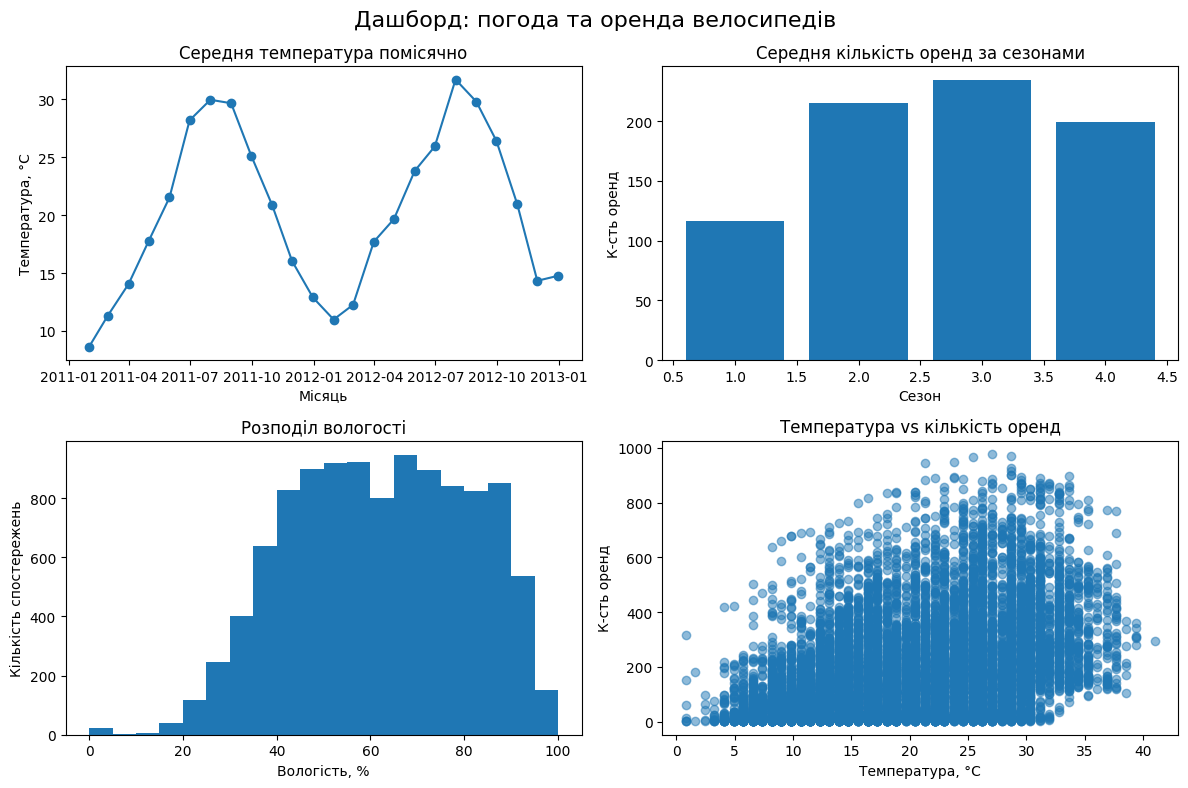

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

fig.suptitle('Дашборд: погода та оренда велосипедів', fontsize=16)

temp_monthly = df['temp'].resample('M').mean()
ax[0, 0].plot(temp_monthly.index, temp_monthly.values, marker='o')
ax[0, 0].set_title("Середня температура помісячно")
ax[0, 0].set_xlabel("Місяць")
ax[0, 0].set_ylabel("Температура, °C")

season_avg = df.groupby('season')['count'].mean()
ax[0, 1].bar(season_avg.index, season_avg.values)
ax[0, 1].set_title("Середня кількість оренд за сезонами")
ax[0, 1].set_xlabel("Сезон")
ax[0, 1].set_ylabel("К-сть оренд")

ax[1, 0].hist(df['humidity'], bins=20)
ax[1, 0].set_title("Розподіл вологості")
ax[1, 0].set_xlabel("Вологість, %")
ax[1, 0].set_ylabel("Кількість спостережень")

ax[1, 1].scatter(df['temp'], df['count'], alpha=0.5)
ax[1, 1].set_title("Температура vs кількість оренд")
ax[1, 1].set_xlabel("Температура, °C")
ax[1, 1].set_ylabel("К-сть оренд")

plt.tight_layout()
plt.show()



plt.subplot() — кожен графік будується окремо і одразу "малюється" на поточній області. Трохи менш гнучкий і менш зручний для масштабних візуалізацій.

plt.subplots() — створюється фігура (fig) і набір осей (ax), після чого ми керуємо кожним підграфіком через методи цих об’єктів. Це дає більше контролю, дозволяє зберігати і змінювати графіки як об’єкти Python, зручніше для складних дашбордів.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

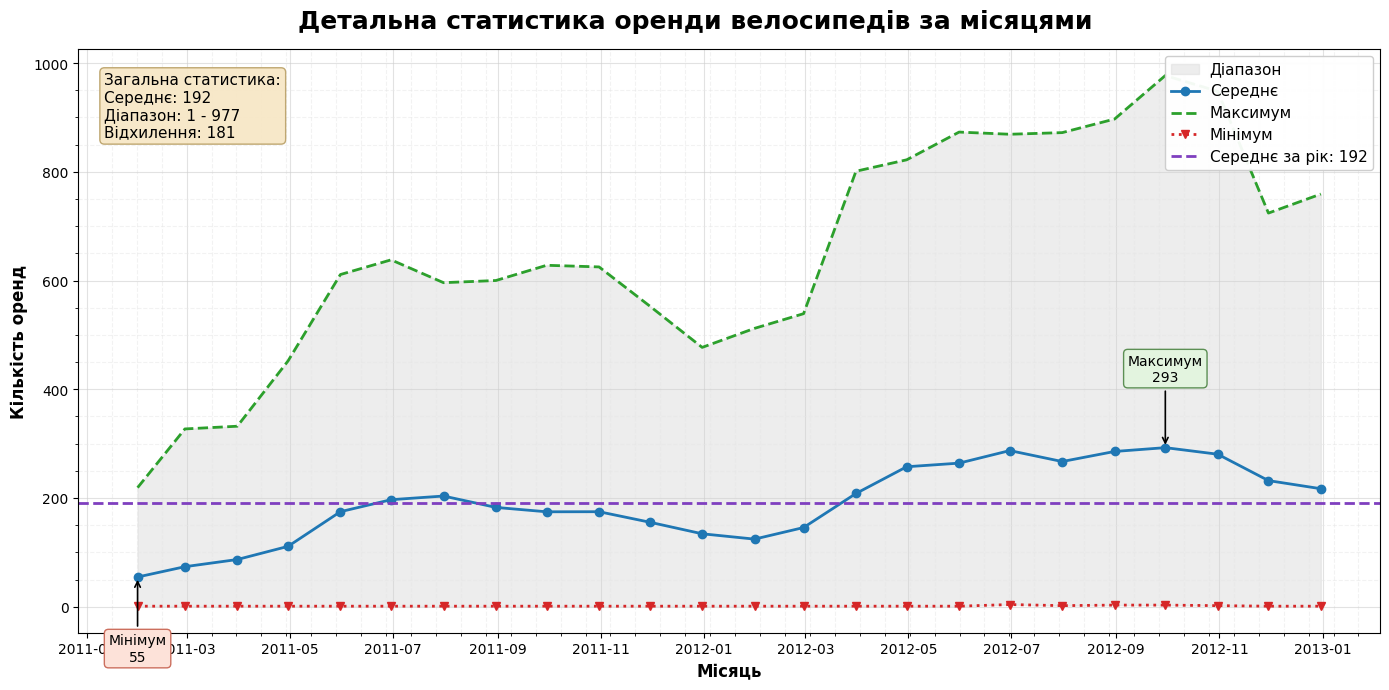

In [22]:
import pandas as pd

if 'datetime' in df.columns and not isinstance(df.index, pd.DatetimeIndex):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.set_index('datetime')

mean_m = df['count'].resample('ME').mean()
min_m  = df['count'].resample('ME').min()
max_m  = df['count'].resample('ME').max()

avg_all = df['count'].mean()
std_all = df['count'].std()
rng_all = (int(df['count'].min()), int(df['count'].max()))

fig, ax = plt.subplots(figsize=(14, 7))
fig.suptitle('Детальна статистика оренди велосипедів за місяцями',
             fontsize=18, fontweight='bold', y=0.98)

ax.fill_between(mean_m.index, min_m.values, max_m.values,
                color='#d9d9d9', alpha=0.45, label='Діапазон')

ax.plot(mean_m.index, mean_m.values, color='#1f77b4', marker='o',
        linewidth=2, label='Середнє')
ax.plot(max_m.index,  max_m.values,  color='#2ca02c', linestyle='--',
        linewidth=2, label='Максимум')
ax.plot(min_m.index,  min_m.values,  color='#d62728', linestyle=':',
        marker='v', linewidth=2, label='Мінімум')

ax.axhline(avg_all, color='#7f3fbf', linestyle='--', linewidth=2,
           label=f'Середнє за рік: {avg_all:.0f}')

i_min = mean_m.idxmin(); v_min = mean_m.min()
i_max = mean_m.idxmax(); v_max = mean_m.max()

ax.annotate(f'Мінімум\n{v_min:.0f}', xy=(i_min, v_min),
            xytext=(i_min, v_min - (0.15*ax.get_ylim()[1])),
            ha='center',
            bbox=dict(facecolor='#fde2d9', edgecolor='#cc6f5e', boxstyle='round'),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.2))

ax.annotate(f'Максимум\n{v_max:.0f}', xy=(i_max, v_max),
            xytext=(i_max, v_max + (0.12*ax.get_ylim()[1])),
            ha='center',
            bbox=dict(facecolor='#e3f4df', edgecolor='#5c8f54', boxstyle='round'),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.2))

stats_txt = (f"Загальна статистика:\n"
             f"Середнє: {avg_all:.0f}\n"
             f"Діапазон: {rng_all[0]} - {rng_all[1]}\n"
             f"Відхилення: {std_all:.0f}")
ax.text(0.02, 0.96, stats_txt, transform=ax.transAxes, va='top',
        fontsize=11, bbox=dict(facecolor='#f7e7c6', edgecolor='#bca36b',
                               boxstyle='round', alpha=0.95))

ax.set_xlabel('Місяць', fontsize=12, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=12, fontweight='bold')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax.get_xticklabels(), rotation=0)

ax.grid(True, which='major', color='#cfcfcf', linestyle='-', alpha=0.6)
ax.grid(True, which='minor', color='#e6e6e6', linestyle='--', alpha=0.5)
ax.minorticks_on()

leg = ax.legend(loc='upper right', frameon=True, shadow=False,
                fancybox=True, framealpha=0.95)
for t in leg.get_texts():
    t.set_fontsize(11)

plt.tight_layout()
plt.show()


**1. Перевага додавання анотацій на графік.** Анотації (наприклад, «Мінімум 55» або «Максимум 293») допомагають швидко помітити ключові точки даних без потреби «вичитувати» всю криву; акцентувати увагу глядача на важливих значеннях (екстремумах, середніх тощо); зробити графік більш «розповідним», тобто він сам пояснює дані навіть без детального опису.

**2. Для чого використовується fill_between()?** Функція fill_between() заповнює простір між двома лініями (у твоєму випадку — між лініями мінімумів і максимумів).
Вона візуально показує діапазон коливань даних; допомагає швидше оцінити стабільність чи нестабільність процесу;робить графік більш інформативним і наочним.

**3. Як текстовий блок допомагає в інтерпретації даних?**Блок з узагальненою статистикою («Середнє: 192, Діапазон: 1–977, Відхилення: 181»): одразу надає основні числові характеристики без необхідності робити додаткові обчислення; полегшує розуміння даних тим, хто дивиться на графік вперше;створює контекст для візуалізації: можна співвіднести побачені піки та спади з узагальненими показниками.